In [1]:
from PIL import Image
from IPython.display import display
import math
import cv2
import numpy as np

In [20]:
import glob
from PIL import Image


# rotate image by 90, 180, and 270 degrees
images = glob.glob("../gan_data_cell_par1/par1/*.jpg")
count=1
for image in images:     
    with open(image, 'rb') as file:        
        img = Image.open(file)
#         display(img)
        img_rot90 = img.rotate(90)
        img_rot180 = img.rotate(180)
        img_rot270 = img.rotate(270)
#         display(img_rot90)        
        str90="../gan_data_cell_par1_rot/rot90/"
        str180="../gan_data_cell_par1_rot/rot180/"
        str270="../gan_data_cell_par1_rot/rot270/"
        
        img_rot90.save(f'{str90}/img_rot90_{count}.jpg')
        img_rot180.save(f'{str180}/img_rot180_{count}.jpg')
        img_rot270.save(f'{str270}/img_rot270_{count}.jpg')
    count=count+1
#     print(count)       

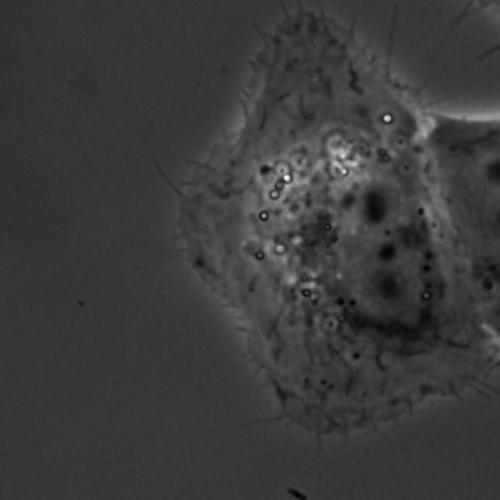

In [12]:
sample_img=Image.open("../gan_data_cell_par1/par1/par1b1_s_001.jpg")
# sample_img.show()
display(sample_img)

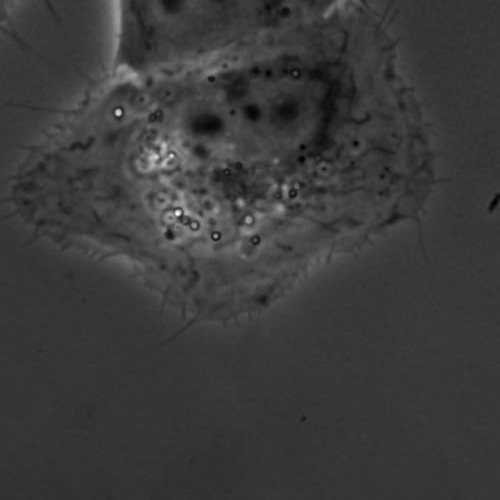

In [13]:
rot_img=sample_img.rotate(90)
display(rot_img)

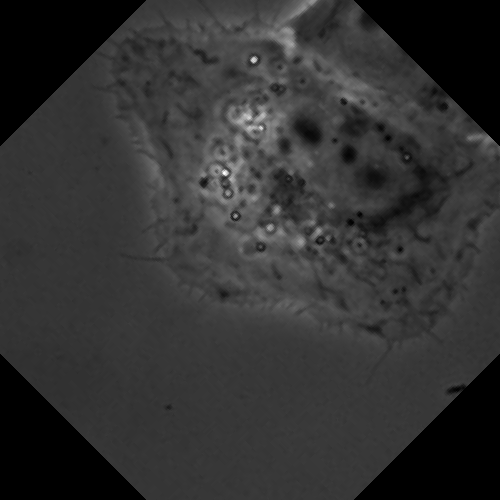

In [14]:
rot45_img=sample_img.rotate(45)
display(rot45_img)

In [15]:
def rotated_rect(w, h, angle):
    """
    Given a rectangle of size wxh that has been rotated by 'angle' (in
    radians), computes the width and height of the largest possible
    axis-aligned rectangle within the rotated rectangle.

    Original JS code by 'Andri' and Magnus Hoff from Stack Overflow

    Converted to Python by Aaron Snoswell
    """
    angle = math.radians(angle)
    quadrant = int(math.floor(angle / (math.pi / 2))) & 3
    sign_alpha = angle if ((quadrant & 1) == 0) else math.pi - angle
    alpha = (sign_alpha % math.pi + math.pi) % math.pi

    bb_w = w * math.cos(alpha) + h * math.sin(alpha)
    bb_h = w * math.sin(alpha) + h * math.cos(alpha)

    gamma = math.atan2(bb_w, bb_w) if (w < h) else math.atan2(bb_w, bb_w)

    delta = math.pi - alpha - gamma

    length = h if (w < h) else w

    d = length * math.cos(alpha)
    a = d * math.sin(alpha) / math.sin(delta)

    y = a * math.cos(gamma)
    x = y * math.tan(gamma)

    return (bb_w - 2 * x, bb_h - 2 * y)

In [16]:
def crop(img, w, h):
    x, y = int(img.shape[1] * .5), int(img.shape[0] * .5)

    return img[
        int(np.ceil(y - h * .5)) : int(np.floor(y + h * .5)),
        int(np.ceil(x - w * .5)) : int(np.floor(x + h * .5))
    ]

def rotate(img, angle):
    # rotate, crop and return original size
    (h, w) = img.shape[:2]
    img = imutils.rotate_bound(img, angle)
    img = crop(img, *rotated_rect(w, h, angle))
    img = cv2.resize(img,(w,h),interpolation=cv2.INTER_AREA)
    return img

In [17]:
rotate(sample_img, 45)

AttributeError: 'JpegImageFile' object has no attribute 'shape'